### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Task 3: To explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [ ]:
print("train data shape {}, train label shape {}".format(X_train.shape,Y_train.shape))
print("test data shape {}, test label shape {}".format(X_test.shape,Y_test.shape))

train data shape (135, 4), train label shape (135,)
test data shape (15, 4), test label shape (15,)


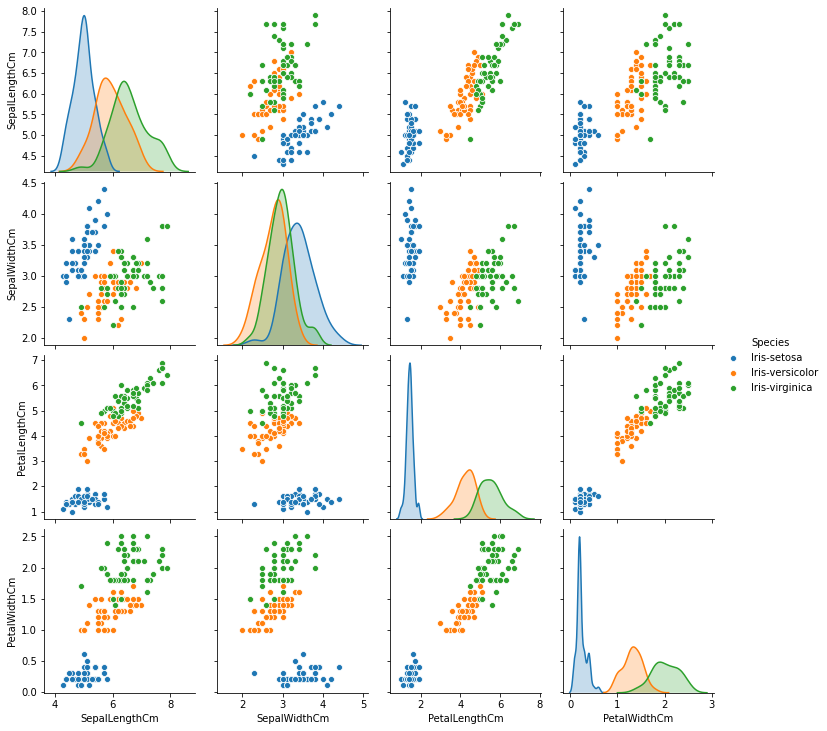

In [ ]:
df = data.iloc[:,1:]
sns.pairplot(df,hue='Species')

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

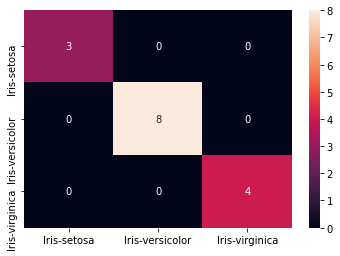

In [ ]:
Y_test_pred = dtc.predict(X_test)
confusion_matrix_df = pd.DataFrame(data = confusion_matrix(Y_test, Y_test_pred),index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                                   columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
sns.heatmap(confusion_matrix_df,annot=True)

In [ ]:
Y_train_pred = dtc.predict(X_train)
Y_test_pred = dtc.predict(X_test)
print('Train accuracy score: ',accuracy_score(Y_train,Y_train_pred))
print('Test accuracy score: ',accuracy_score(Y_test,Y_test_pred))

Train accuracy score:  1.0
Test accuracy score:  1.0


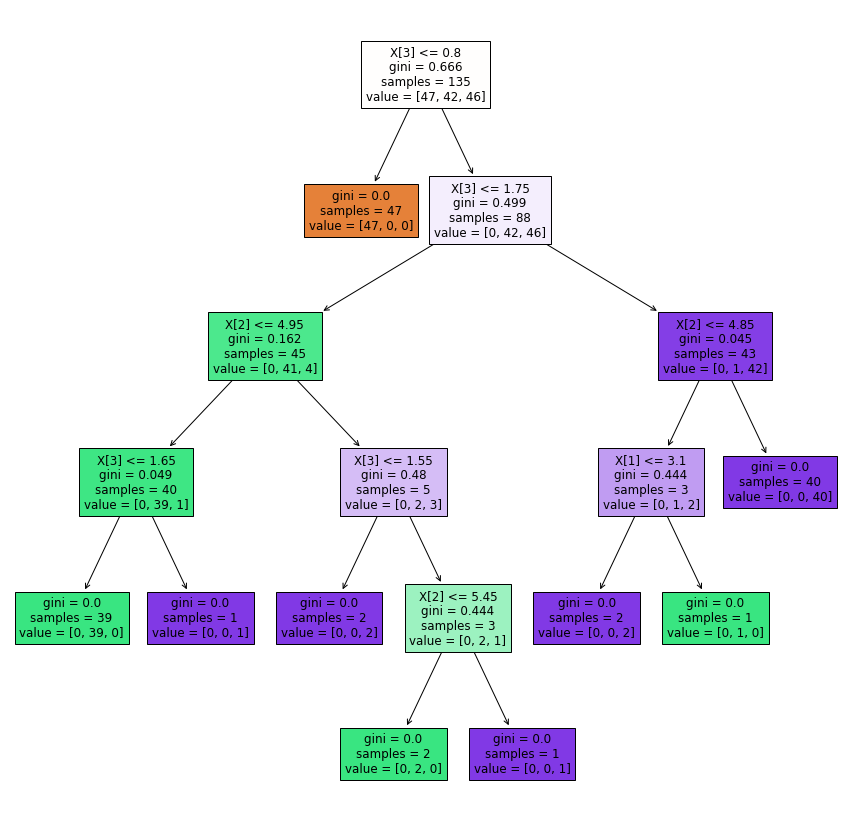

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
plot_tree(dtc,filled=True)
print()